# <font color=green>TP FINAL - ALGORITHMES D'APPRENTISSAGE SUPERVISÉ</font>

- Ricardo Vallejo
- Yulia Kalugina

#  <font color=blue>1.  LOAD DATA</font>

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

dataOriginal = pd.read_csv("covid.csv")
pd.set_option('display.max_rows', None)
dataOriginal = dataOriginal.head(350000)
dataOriginal.head(5)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


## 1.1. LOAD METADA

In [89]:
cat_si_no = pd.read_excel("Catalogs.xlsx", 'Catálogo SI_NO')
pd.set_option('display.max_rows', None)
cat_si_no.head(5)

,CLAVE,DESCRIPCIÓN
0,1,SI
1,2,NO
2,97,NO APLICA
3,98,SE IGNORA
4,99,NO ESPECIFICADO


In [90]:
cat_pacient_type = pd.read_excel("Catalogs.xlsx", 'Catálogo TIPO_PACIENTE')
pd.set_option('display.max_rows', None)
cat_pacient_type.head(5)

,CLAVE,DESCRIPCIÓN
0,1,AMBULATORIO
1,2,HOSPITALIZADO
2,99,NO ESPECIFICADO


In [91]:
cat_sex = pd.read_excel("Catalogs.xlsx", 'Catálogo SEXO')
pd.set_option('display.max_rows', None)
cat_sex.head(5)

,CLAVE,DESCRIPCIÓN
0,1,MUJER
1,2,HOMBRE
2,99,NO ESPECIFICADO


In [92]:
cat_result = pd.read_excel("Catalogs.xlsx", 'Catálogo RESULTADO')
pd.set_option('display.max_rows', None)
cat_sex.head(5)

,CLAVE,DESCRIPCIÓN
0,1,MUJER
1,2,HOMBRE
2,99,NO ESPECIFICADO


<div style="page-break-after: always;"></div>

## <font color=blue>2. IDENTIFYING MODEL VARIABLES </font>


In [93]:
dataInfo = pd.read_excel("covidInfo.xlsx", "DataTypes")
pd.set_option('display.max_rows', None)
dataInfo

,Variable Name,DB Type,Model Type,CATALOG
0,id,String,Non informative,N.A
1,sex,int,"Categorical, Numerical, Non-ordinal, Nominal",Catálogo SEXO
2,patient_type,String / Date,"Categorical, Numerical, Non-ordinal, Nominal",Catálogo TIPO_PACIENTE
3,entry_date,String / Date,Date,N.A
4,date_symptoms,String / Date,Date,N.A
5,date_died,String / Date,Date,N.A
6,intubed,int,"Categorical, Numerical, Non-ordinal, Nominal",Catálogo SI_NO
7,pneumonia,int,"Categorical, Numerical, Non-ordinal, Nominal",Catálogo SI_NO
8,age,int,"Quantitative, Numerical, Non-ordinal, Nominal",N.A
9,pregnancy,int,"Categorical, Numerical, Non-ordinal, Nominal",Catálogo SI_NO


In [94]:
# All labels
datalabels = ['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms',
              'date_died','intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco','contact_other_covid'
              ,'covid_res','icu']

# Ignored: id, entrydate, date_symptons, date_died, icu
predictors = ['sex', 'patient_type',
              'intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco',
              'contact_other_covid','covid_res']

target_column= 'icu'

model_columns = ['sex', 'patient_type',
              'intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco',
              'contact_other_covid','covid_res', target_column]

prefered_columns = ['sex','cardiovascular','obesity','tobacco','contact_other_covid','covid_res', target_column]

<div style="page-break-after: always;"></div>

#  <font color=blue>3. DATA EXPLORATION</font>

# 3.1.  Inspecting for types and Null values detection

In [95]:
dataOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350000 entries, 0 to 349999
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   350000 non-null  object
 1   sex                  350000 non-null  int64 
 2   patient_type         350000 non-null  int64 
 3   entry_date           350000 non-null  object
 4   date_symptoms        350000 non-null  object
 5   date_died            350000 non-null  object
 6   intubed              350000 non-null  int64 
 7   pneumonia            350000 non-null  int64 
 8   age                  350000 non-null  int64 
 9   pregnancy            350000 non-null  int64 
 10  diabetes             350000 non-null  int64 
 11  copd                 350000 non-null  int64 
 12  asthma               350000 non-null  int64 
 13  inmsupr              350000 non-null  int64 
 14  hypertension         350000 non-null  int64 
 15  other_disease        350000 non-nu

In [96]:
dataOriginal.isnull().values.sum()

0

# 3.1.1.  Searching odd information in numerical descriptor - AGE

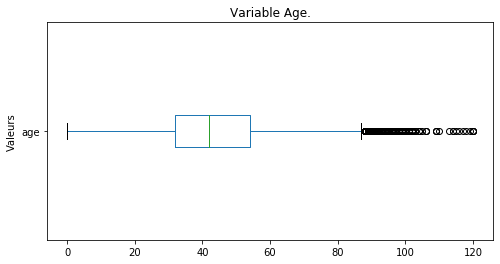

In [97]:
#Diagram de moustache

dataOriginal.boxplot(column='age', figsize=(8,4), vert=False)
plt.ylabel("Valeurs")
plt.title("Variable Age." )
plt.grid()
plt.show()

<font color='blue'>We filter data with ages with outliers?</font>

In [98]:
dataModel =  dataOriginal[dataOriginal['age']<95]

In [99]:
dataModel.shape[0] - dataOriginal.shape[0]

-374

<div style="page-break-after: always;"></div>

# 3.2. Inspecting quantitative variables - Age

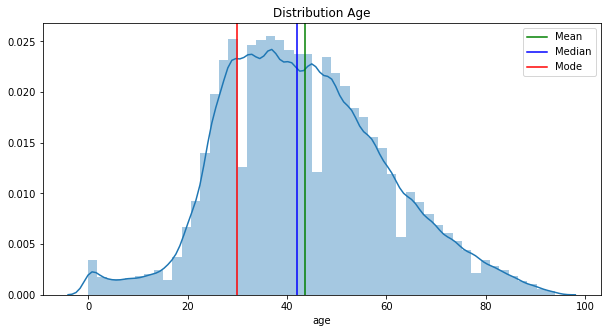

In [100]:
import seaborn as sns

mean=dataModel['age'].mean();
median=dataModel['age'].median();
mode=dataModel['age'].mode();
fig, ax = plt.subplots(figsize=(10,5));

sns.distplot(dataModel['age']);
plt.title('Distribution Age');
plt.axvline(mean,color='green',label='Mean'); 
plt.axvline(median,color='blue',label='Median');
plt.axvline(mode[0],color='red',label='Mode')

plt.legend();

In [101]:
mean

43.55038240863094

In [102]:
mode

0    30
dtype: int64

# 3.3. Inspecting categorical variables 

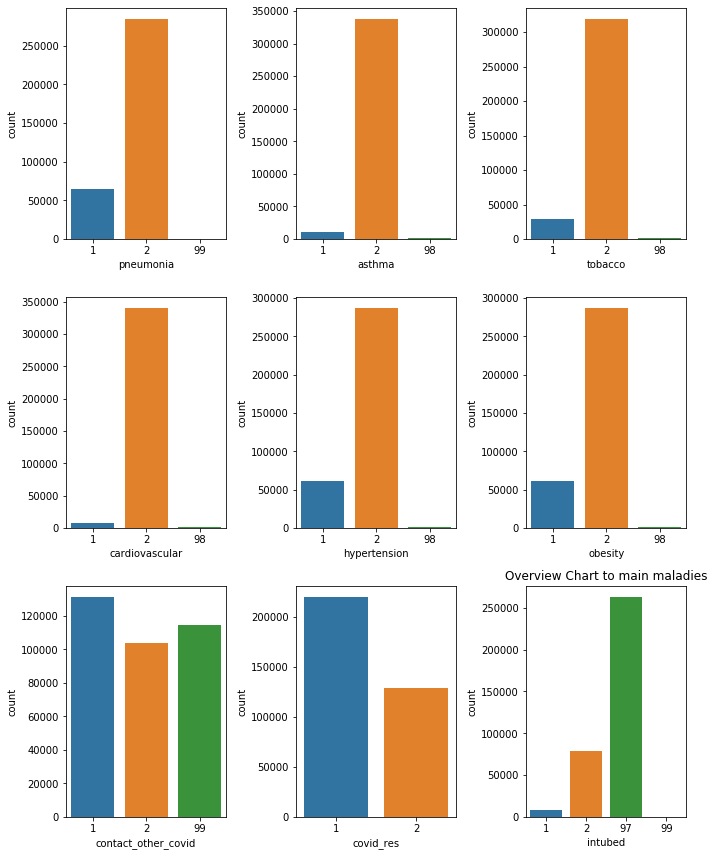

In [103]:
import matplotlib.pyplot as plt


fig, ax =plt.subplots(3,3)
 
fig.set_size_inches(10, 12, forward=True)
plt.title("Overview Chart to main maladies")

sns.countplot(x='pneumonia', data=dataModel, ax=ax[0,0])
sns.countplot(x='asthma', data=dataModel, ax=ax[0,1])
sns.countplot(x='tobacco', data=dataModel, ax=ax[0,2])

sns.countplot(x='cardiovascular', data=dataModel, ax=ax[1,0])
sns.countplot(x='hypertension', data=dataModel, ax=ax[1,1])
sns.countplot(x='obesity', data=dataModel, ax=ax[1,2])

sns.countplot(x='contact_other_covid', data=dataModel, ax=ax[2,0])
sns.countplot(x='covid_res', data=dataModel, ax=ax[2,1])
sns.countplot(x='intubed', data=dataModel, ax=ax[2,2])
#fig.legend() use handles
fig.tight_layout()


In [104]:
cat_si_no

,CLAVE,DESCRIPCIÓN
0,1,SI
1,2,NO
2,97,NO APLICA
3,98,SE IGNORA
4,99,NO ESPECIFICADO


## Calculate numerical values

In [105]:
pd.DataFrame(dataModel['pneumonia'].value_counts())

,pneumonia
2,284860
1,64761
99,5


In [106]:
pd.DataFrame(dataModel['asthma'].value_counts())

,asthma
2,337798
1,10730
98,1098


In [107]:
pd.DataFrame(dataModel['tobacco'].value_counts())

,tobacco
2,319167
1,29260
98,1199


In [108]:
pd.DataFrame(dataModel['pregnancy'].value_counts())

,pregnancy
97,181997
2,164177
1,2448
98,1004


## 3.3.1.  Inspecting categorical variables using bivariable relatioships with sex of patients.


In [109]:
cat_sex

,CLAVE,DESCRIPCIÓN
0,1,MUJER
1,2,HOMBRE
2,99,NO ESPECIFICADO


In [110]:
cat_si_no

,CLAVE,DESCRIPCIÓN
0,1,SI
1,2,NO
2,97,NO APLICA
3,98,SE IGNORA
4,99,NO ESPECIFICADO


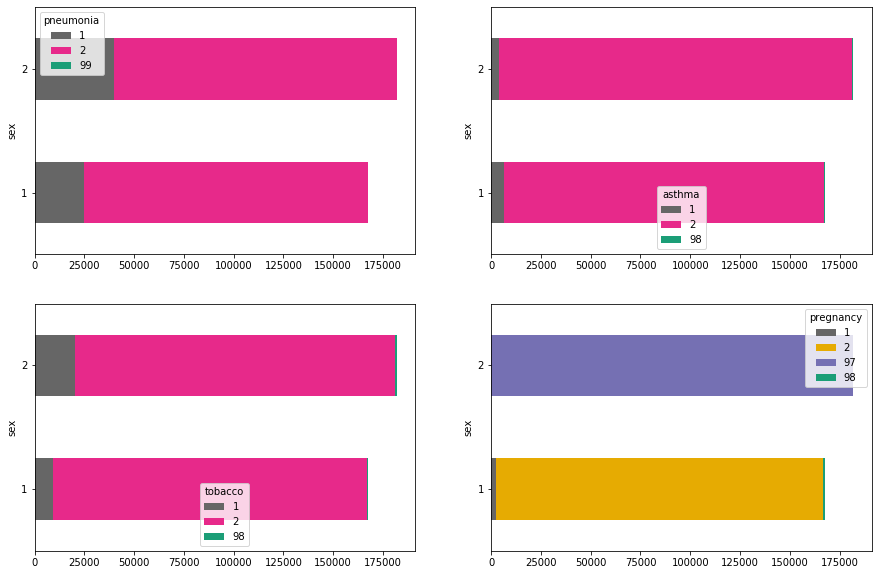

In [24]:
fig, axs = plt.subplots(2,2)

pneumonia_bySex= dataModel.pivot_table(index='sex', columns='pneumonia', values='icu', aggfunc='count')
pneumonia_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[0,0])

asthma_bySex= dataModel.pivot_table(index='sex', columns='asthma', values='icu', aggfunc='count')
asthma_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[0,1])

tobacco_bySex= dataModel.pivot_table(index='sex', columns='tobacco', values='icu', aggfunc='count')
tobacco_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[1,0])
,
pregnancy_bySex= dataModel.pivot_table(index='sex', columns='pregnancy', values='icu', aggfunc='count')
pregnancy_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[1,1])



## Calculate numerical values

In [25]:
pneumonia_bySex

pneumonia,1,2,99
sex,,,
1,24781,142845,3
2,39980,142015,2


In [26]:
tobacco_bySex

tobacco,1,2,98
sex,,,
1,9066,158117,446
2,20194,161050,753


In [27]:
asthma_bySex

asthma,1,2,98
sex,,,
1,6576,160633,420
2,4154,177165,678


In [28]:
pregnancy_bySex

pregnancy,1,2,97,98
sex,,,,
1,2448.0,164177.0,NaN,1004.0
2,NaN,NaN,181997.0,NaN


# 3.3.2. Inspecting categorical variables using bivariable relatioships with ICU (Intensive Care Medical Unit) reference

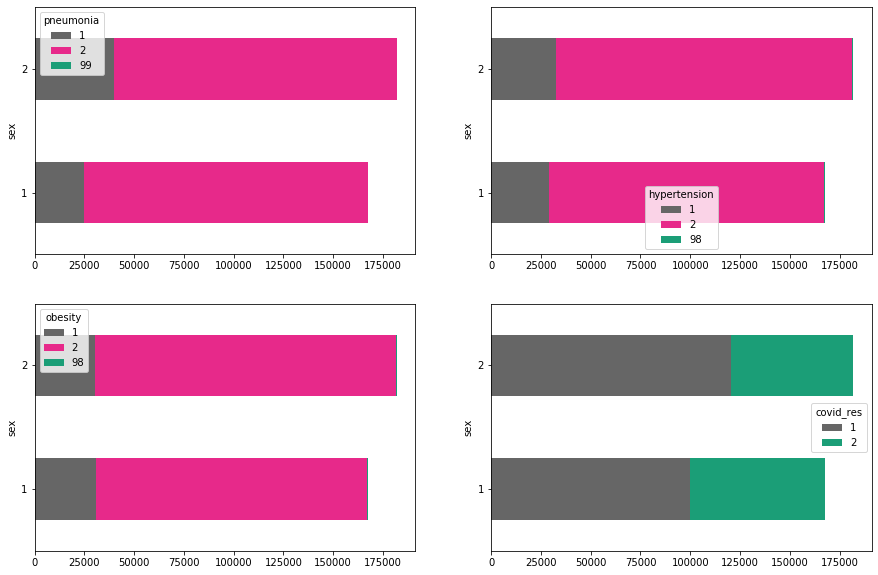

In [29]:
fig, axs = plt.subplots(2,2)

cardiovascular_bySex= dataModel.pivot_table(index='sex', columns='cardiovascular', values='icu', aggfunc='count')
pneumonia_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[0,0])

hypertension_bySex= dataModel.pivot_table(index='sex', columns='hypertension', values='icu', aggfunc='count')
hypertension_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[0,1])

obesity_bySex= dataModel.pivot_table(index='sex', columns='obesity', values='icu', aggfunc='count')
obesity_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[1,0])

covid_res_bySex= dataModel.pivot_table(index='sex', columns='covid_res', values='icu', aggfunc='count')
covid_res_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[1,1])


In [30]:
cardiovascular_bySex

cardiovascular,1,2,98
sex,,,
1,3531,163666,432
2,4453,176829,715


In [31]:
hypertension_bySex

hypertension,1,2,98
sex,,,
1,28949,138257,423
2,32393,148890,714


In [32]:
obesity_bySex

obesity,1,2,98
sex,,,
1,30631,136574,424
2,30554,150743,700


In [33]:
covid_res_bySex

covid_res,1,2
sex,,
1,99743,67886
2,120688,61309


## Inspecting relationship between categorical variables - Diseases vs ICU assignation - Overview respiratory diseases

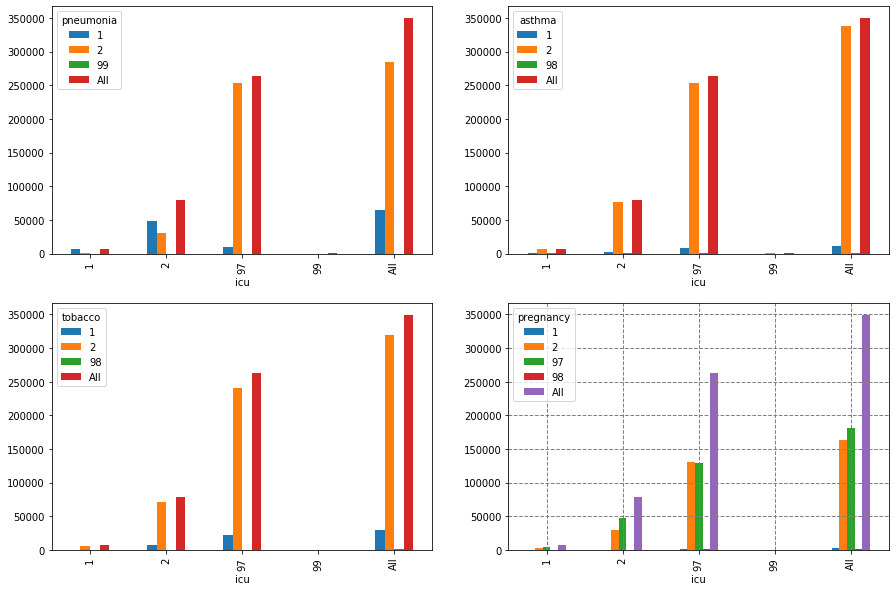

In [34]:
fig, axs = plt.subplots(2,2)
pneumonia_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataModel['pneumonia'], 
            margins=True)
pneumonia_byICU.plot(kind='bar',ax=axs[0,0], figsize=[15,10])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Asthma diagnostic and ICU assignation COVID')
asthma_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataModel['asthma'], 
            margins=True)
asthma_byICU.plot(kind='bar',ax=axs[0,1])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Tobacco diagnostic and ICU assignation COVID')
tobacco_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataModel['tobacco'], 
            margins=True)
tobacco_byICU.plot(kind='bar',ax=axs[1,0])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Pregnancy diagnostic and ICU assignation COVID')
pregnancy_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataModel['pregnancy'], 
            margins=True)
pregnancy_byICU.plot(kind='bar',ax=axs[1,1])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Pneumonia diagnostic and ICU assignation COVID')


In [35]:
pneumonia_byICU

pneumonia,1,2,99,All
icu,,,,
1,6203,1073,0,7276
2,48704,30358,0,79062
97,9803,253378,5,263186
99,51,51,0,102
All,64761,284860,5,349626


In [36]:
asthma_byICU

asthma,1,2,98,All
icu,,,,
1,180,7014,82,7276
2,1976,76737,349,79062
97,8571,253948,667,263186
99,3,99,0,102
All,10730,337798,1098,349626


In [37]:
tobacco_byICU

tobacco,1,2,98,All
icu,,,,
1,611,6581,84,7276
2,6872,71796,394,79062
97,21771,240694,721,263186
99,6,96,0,102
All,29260,319167,1199,349626


In [38]:
pregnancy_byICU

pregnancy,1,2,97,98,All
icu,,,,,
1,49,2431,4786,10,7276
2,626,30286,48056,94,79062
97,1772,131418,129096,900,263186
99,1,42,59,0,102
All,2448,164177,181997,1004,349626


## Inspecting relationship between diseases and ICU assignation - Overview General diseases

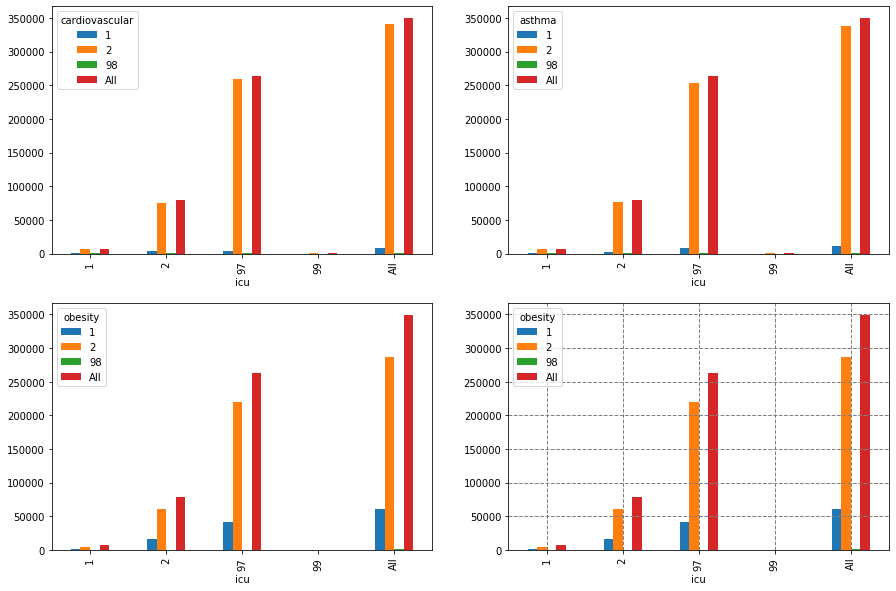

In [39]:
fig, axs = plt.subplots(2,2)
cardiovascular_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataOriginal['cardiovascular'], 
            margins=True)
cardiovascular_byICU.plot(kind='bar',ax=axs[0,0], figsize=[15,10])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Asthma diagnostic and ICU assignation COVID')
hypertension_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataOriginal['hypertension'], 
            margins=True)
asthma_byICU.plot(kind='bar',ax=axs[0,1])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Tobacco diagnostic and ICU assignation COVID')
obesity_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataOriginal['obesity'], 
            margins=True)
obesity_byICU.plot(kind='bar',ax=axs[1,0])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Pregnancy diagnostic and ICU assignation COVID')
obesity_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataOriginal['obesity'], 
            margins=True)
obesity_byICU.plot(kind='bar',ax=axs[1,1])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Pneumonia diagnostic and ICU assignation COVID')


# 3.3.  Analysis variable quantitative vs qualitative

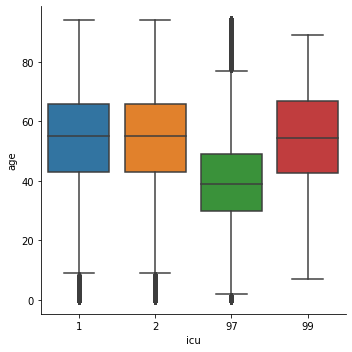

In [40]:
sns.catplot(x="icu", y="age", kind="box", data=dataModel)

# 4.  Classes identification

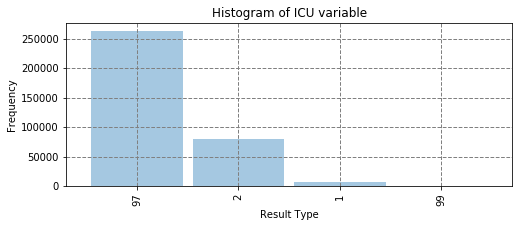

In [41]:
targetOriginal = dataModel['icu']
E1 = targetOriginal.value_counts()
E1.plot(kind = 'bar',
           stacked = 'True',          # Muestra las barras apiladas
           alpha = 0.4,               # nivel de transparencia
           width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
           figsize=(8,3));

plt.grid(color='gray', linestyle='--', linewidth=1)
plt.title('Histogram of ICU variable')
plt.xlabel("Result Type")
plt.ylabel("Frequency")
plt.show()



In [42]:
cat_si_no

,CLAVE,DESCRIPCIÓN
0,1,SI
1,2,NO
2,97,NO APLICA
3,98,SE IGNORA
4,99,NO ESPECIFICADO


In [43]:
E1

97    263186
2      79062
1       7276
99       102
Name: icu, dtype: int64

## 3.2. Check the distribution or instances of any class

In [44]:
pd.DataFrame(targetOriginal.value_counts())

,icu
97,263186
2,79062
1,7276
99,102


In [45]:
pd.DataFrame(targetOriginal.value_counts(normalize=True) * 100)

,icu
97,75.276438
2,22.613307
1,2.081081
99,0.029174


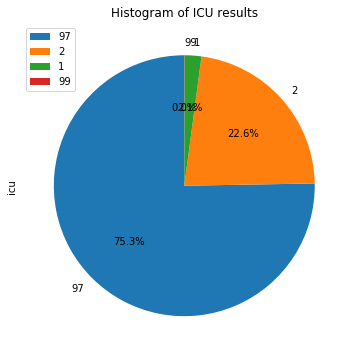

In [46]:
E2 = targetOriginal.value_counts(normalize=True)
E2.plot.pie(subplots=True, figsize = (6,6), autopct = '%1.1f%%', startangle = 90)
plt.title('Histogram of ICU results')
plt.legend(E2.index, loc = 'upper left', fontsize = 10)
plt.show() #ok


#?? Sur tout les data ou seulement sur les donnes ou ilya ICU??

# <font color=blue>4.  IMPUTATION AND DETECTION OF NULL AND ODD VALUES.</font>

## Check for null values in the dataset

In [47]:
dataModel.isnull().values.sum()

0

In [48]:
dataModel.isnull().values.sum()

0

# <font color=blue> 5.  CORRELATION ANALYSIS</font>

## 5.1 Correlation Matrix

# <font color="blue">6.  VARIABLE REDUCTION</font>

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

<font color="red"> Jai essaie Variance Tresholding, normalisation et standarisation, mais ca marche pas pour notre cas.<font>


# 6.2.  Chi-Squared Feature Selection

Pearson’s chi-squared statistical hypothesis test is an example of a test for independence between categorical variables

The degree of association between predictor and outcome can be measured with statistics such as X2 (chi-squared) tests.


1.Define Hypothesis
Null Hypothesis (H0): Two variables are independent.
Alternate Hypothesis (H1): Two variables are not independent.

In [111]:
import scipy.stats as ss #import chi2_contingency


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return round(np.sqrt(phi2corr/min((kcorr-1),(rcorr-1))),3)


cramers_v(dataModel['pneumonia'], dataModel['sex'])


0.092

In [112]:

cramers_v(dataModel['hypertension'], dataModel['obesity'])

0.579

In [113]:
df2 = pd.DataFrame(columns=model_columns, index=model_columns)
for i in range(len(model_columns)):
    for j in range(len(model_columns)):
        fname = model_columns[i]
        cname = model_columns[j]
        df2.loc[fname, cname] = cramers_v(dataModel[fname], dataModel[cname])

display(df2)

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
sex,1,0.105,0.106,0.092,0.058,1,0.02,0.012,0.049,0.014,0.014,0.03,0.016,0.022,0.019,0.104,0.053,0.07,0.106
patient_type,0.105,1,1,0.665,0.414,0.107,0.269,0.113,0.027,0.087,0.243,0.087,0.098,0.073,0.142,0.021,0.29,0.188,1
intubed,0.106,1,1,0.477,0.24,0.062,0.192,0.084,0.032,0.067,0.174,0.068,0.074,0.059,0.104,0.029,0.218,0.189,0.856
pneumonia,0.092,0.665,0.477,1,0.239,0.066,0.16,0.064,0.018,0.044,0.141,0.04,0.055,0.056,0.073,0.015,0.137,0.185,0.474
age,0.058,0.414,0.24,0.239,1,0.069,0.255,0.149,0.026,0.048,0.294,0.053,0.116,0.089,0.08,0.048,0.125,0.174,0.243
pregnancy,1,0.107,0.062,0.066,0.069,1,0.051,0.05,0.06,0.048,0.053,0.047,0.05,0.05,0.049,0.086,0.043,0.071,0.062
diabetes,0.02,0.269,0.192,0.16,0.255,0.051,1,0.595,0.595,0.558,0.651,0.481,0.581,0.535,0.588,0.545,0.078,0.098,0.191
copd,0.012,0.113,0.084,0.064,0.149,0.05,0.595,1,0.655,0.611,0.618,0.525,0.632,0.573,0.631,0.594,0.039,0.011,0.081
asthma,0.049,0.027,0.032,0.018,0.026,0.06,0.595,0.655,1,0.625,0.623,0.532,0.639,0.583,0.64,0.602,0.016,0.025,0.022
inmsupr,0.014,0.087,0.067,0.044,0.048,0.048,0.558,0.611,0.625,1,0.594,0.574,0.615,0.554,0.615,0.573,0.031,0.02,0.063


In [114]:
df2.shape

(19, 19)

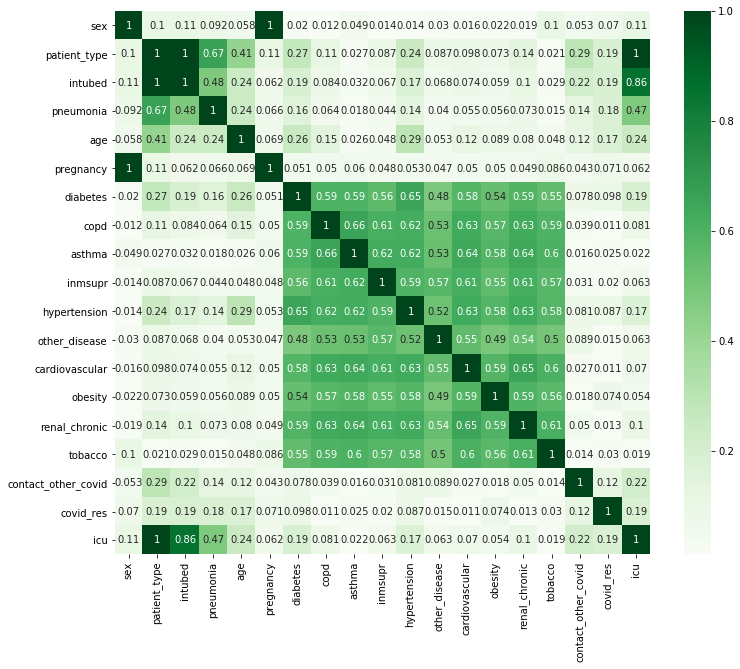

In [115]:
import seaborn as sns

df2 = df2.astype('float')  # !! Neccessary for Heatmap

plt.figure(figsize=(12,10))
sns.heatmap(df2, annot=True, cmap="Greens")
plt.show()

# <font color="blue">7.  MODELISATION & PREDICTION</font>

## <font color="blue">7.1.  Splitting DATA to create Training and Test sets.</font>

In [116]:
# Labels for descriptors

datalabels = ['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms',
              'date_died','intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco','contact_other_covid'
              ,'covid_res','icu']

# Ignored: id, entrydate, date_symptons, date_died, icu
predictors = ['sex', 'age','pneumonia','contact_other_covid','covid_res',
              'pregnancy','diabetes','copd','asthma','inmsupr',
              'hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco'
             ]

target_column= 'icu'

target_column2 = 'intubed'

model_columns = ['sex', 'age','pneumonia','contact_other_covid','covid_res',
              'pregnancy','diabetes','copd','asthma','inmsupr',
              'hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco', target_column]


# Split in traning and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(dataModel[predictors], 
                                                   dataModel[target_column], 
                                                   test_size=0.20, random_state=44)



In [117]:
print("Size training set: ", X_train.shape)
print("Size test set: ", X_test.shape)



Size training set:  (279700, 16)
Size test set:  (69926, 16)


# 7.1 KNN

In [58]:
from sklearn import neighbors, datasets
import time

startTimeKNN = time.time()
weights = 'uniform'
k_neighbors = 15
model1 = neighbors.KNeighborsClassifier(weights=weights)
model1.fit(X_train, y_train.values.ravel())
endtimeKNN = time.time()


In [59]:
KNN_sec=endtimeKNN - startTimeKNN
KNN_sec

199.19060134887695

## 7.1.1  Model Evaluation

In [60]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69926 entries, 71593 to 229900
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   sex                  69926 non-null  int64
 1   age                  69926 non-null  int64
 2   patient_type         69926 non-null  int64
 3   intubed              69926 non-null  int64
 4   pneumonia            69926 non-null  int64
 5   pregnancy            69926 non-null  int64
 6   diabetes             69926 non-null  int64
 7   copd                 69926 non-null  int64
 8   asthma               69926 non-null  int64
 9   inmsupr              69926 non-null  int64
 10  hypertension         69926 non-null  int64
 11  other_disease        69926 non-null  int64
 12  cardiovascular       69926 non-null  int64
 13  obesity              69926 non-null  int64
 14  renal_chronic        69926 non-null  int64
 15  tobacco              69926 non-null  int64
 16  contact_other_cov

In [61]:
X_test.head(5)

,sex,age,patient_type,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
71593,1,36,1,97,2,2,2,2,1,2,2,2,2,2,2,2,99,1
196136,1,52,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,1
227259,2,20,1,97,2,97,2,2,2,2,2,2,2,2,2,1,99,2
259004,1,33,1,97,2,1,2,2,2,2,2,2,2,2,2,2,2,2
230905,2,36,1,97,2,97,2,2,2,2,2,2,2,2,2,2,99,2


In [62]:
X_train.head(5)

,sex,age,patient_type,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
209552,2,57,2,2,2,97,98,2,98,98,98,2,98,98,2,98,2,1
94988,1,51,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,1
21959,1,53,2,2,1,2,1,2,2,2,1,2,2,2,2,2,2,1
214002,2,71,2,2,1,97,1,2,2,2,1,2,1,1,2,2,99,1
206645,1,54,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,1


In [63]:
# METRIQUES

from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import time

y_predicted_train = model1.predict(X_train)
y_predicted_test = model1.predict(X_test)



In [64]:

startTimeKNN = time.time()
print("Accuracy:", metrics.accuracy_score(y_predicted_train, y_train))

endtimeKNN = time.time()
eval_KNN_sec = endtimeKNN - startTimeKNN
eval_KNN_sec

Accuracy: 0.9823203432248838


0.01060938835144043

In [65]:
startTimeKNN = time.time()

print(confusion_matrix(y_test, y_predicted_test))

endtimeKNN = time.time()
EVAL_KNN_sec = endtimeKNN - startTimeKNN
EVAL_KNN_sec

[[  241  1250     0     0]
 [  248 15600     4     0]
 [    0     5 52545     0]
 [    0     1    29     3]]


0.04903149604797363

In [66]:
print("Precision: ", metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn'))

Precision:  0.9718224605324951


In [67]:

print ("Recall:", metrics.recall_score(y_test, y_predicted_test,  average='macro') )


Recall: 0.5591383453298758


In [68]:
print ("F1 score:", metrics.f1_score(y_test, y_predicted_test, average='macro'))


F1 score: 0.5909086543808026


# 7.2. DESICION TREE

## 7.2.1 DESICION TREE - Entropy

In [69]:
from sklearn import tree
desicionTree = tree.DecisionTreeClassifier(max_depth =3, criterion='entropy', random_state=44, min_samples_leaf=5)
desicionTree.fit(X_train, y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=44, splitter='best')

[Text(125.55000000000001, 380.52, 'patient_type <= 1.5\nentropy = 0.912\nsamples = 279700\nvalue = [5785, 63210, 210636, 69]'),
 Text(83.7, 271.8, 'entropy = 0.0\nsamples = 210636\nvalue = [0, 0, 210636, 0]'),
 Text(167.4, 271.8, 'intubed <= 1.5\nentropy = 0.427\nsamples = 69064\nvalue = [5785, 63210, 0, 69]'),
 Text(83.7, 163.07999999999998, 'contact_other_covid <= 50.5\nentropy = 1.0\nsamples = 6173\nvalue = [3022, 3151, 0, 0]'),
 Text(41.85, 54.360000000000014, 'entropy = 1.0\nsamples = 4844\nvalue = [2476, 2368, 0, 0]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.977\nsamples = 1329\nvalue = [546, 783, 0, 0]'),
 Text(251.10000000000002, 163.07999999999998, 'intubed <= 50.5\nentropy = 0.272\nsamples = 62891\nvalue = [2763, 60059, 0, 69]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.26\nsamples = 62822\nvalue = [2763, 60059, 0, 0]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.0\nsamples = 69\nvalue = [0, 0, 0, 69]')]

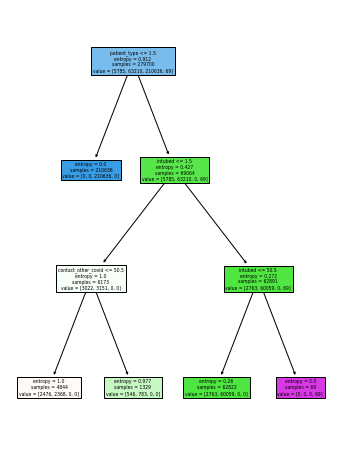

In [70]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize = (6,8))
plot_tree(desicionTree, feature_names = predictors, filled = True)


In [71]:

y_predicted_train = desicionTree.predict(X_train)
y_predicted_test = desicionTree.predict(X_test)



In [72]:

startTimeKNN = time.time()
print("Accuracy:", metrics.accuracy_score(y_predicted_train, y_train))

endtimeKNN = time.time()
eval_KNN_sec = endtimeKNN - startTimeKNN
eval_KNN_sec

Accuracy: 0.9797032534858777


0.011999368667602539

In [73]:
print("Precision: ", metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn'))

Precision:  0.9770008191180214


In [74]:

print ("Recall:", metrics.recall_score(y_test, y_predicted_test,  average='macro') )


Recall: 0.8358438631006095


In [75]:
print ("F1 score:", metrics.f1_score(y_test, y_predicted_test, average='macro'))

F1 score: 0.8474951210379034


## 7.22 DESICION TREE - GINI


[Text(209.25, 380.52, 'patient_type <= 1.5\ngini = 0.381\nsamples = 279700\nvalue = [5785, 63210, 210636, 69]'),
 Text(139.5, 271.8, 'gini = 0.0\nsamples = 210636\nvalue = [0, 0, 210636, 0]'),
 Text(279.0, 271.8, 'intubed <= 1.5\ngini = 0.155\nsamples = 69064\nvalue = [5785, 63210, 0, 69]'),
 Text(139.5, 163.07999999999998, 'contact_other_covid <= 50.5\ngini = 0.5\nsamples = 6173\nvalue = [3022, 3151, 0, 0]'),
 Text(69.75, 54.360000000000014, 'gini = 0.5\nsamples = 4844\nvalue = [2476, 2368, 0, 0]'),
 Text(209.25, 54.360000000000014, 'gini = 0.484\nsamples = 1329\nvalue = [546, 783, 0, 0]'),
 Text(418.5, 163.07999999999998, 'intubed <= 50.5\ngini = 0.086\nsamples = 62891\nvalue = [2763, 60059, 0, 69]'),
 Text(348.75, 54.360000000000014, 'gini = 0.084\nsamples = 62822\nvalue = [2763, 60059, 0, 0]'),
 Text(488.25, 54.360000000000014, 'gini = 0.0\nsamples = 69\nvalue = [0, 0, 0, 69]')]

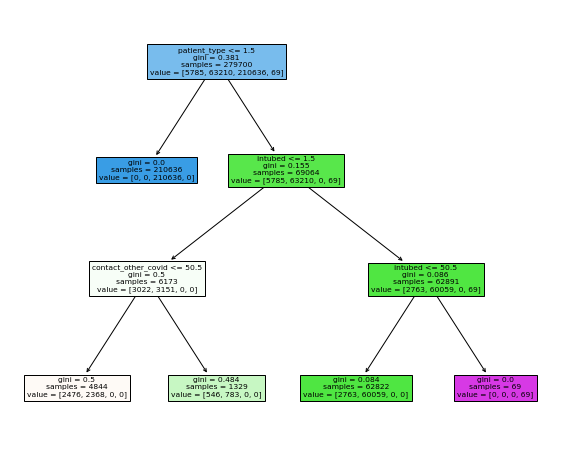

In [76]:
from sklearn import tree
desicionTree = tree.DecisionTreeClassifier(max_depth =3, criterion='gini', random_state=44, min_samples_leaf=2)
desicionTree.fit(X_train, y_train)
plt.figure(figsize = (10,8))
plot_tree(desicionTree, feature_names = predictors, filled = True)


In [77]:
y_predicted_train = desicionTree.predict(X_train)
y_predicted_test = desicionTree.predict(X_test)

In [78]:
startTimeKNN = time.time()
print("Accuracy:", metrics.accuracy_score(y_predicted_train, y_train))

endtimeKNN = time.time()
eval_KNN_sec = endtimeKNN - startTimeKNN
eval_KNN_sec

Accuracy: 0.9797032534858777


0.016003131866455078

In [79]:
print("Precision: ", metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn'))

Precision:  0.9770008191180214


In [80]:

print ("Recall:", metrics.recall_score(y_test, y_predicted_test,  average='macro') )


Recall: 0.8358438631006095


In [81]:
print ("F1 score:", metrics.f1_score(y_test, y_predicted_test, average='macro'))

F1 score: 0.8474951210379034


# 7.3. NAYVE BAYES

In [82]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)





GaussianNB(priors=None, var_smoothing=1e-09)

In [83]:
y_predicted_train = gnb.predict(X_train)
y_predicted_test = gnb.predict(X_test)

In [84]:
startTimeKNN = time.time()
print("Accuracy:", metrics.accuracy_score(y_predicted_train, y_train))

endtimeKNN = time.time()
eval_KNN_sec = endtimeKNN - startTimeKNN
eval_KNN_sec

Accuracy: 0.9771862710046478


0.014977455139160156

In [85]:
print("Precision: ", metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn'))

Precision:  0.9780587299064138


In [86]:

print ("Recall:", metrics.recall_score(y_test, y_predicted_test,  average='macro') )

Recall: 0.8429978945773372


In [87]:
print ("F1 score:", metrics.f1_score(y_test, y_predicted_test, average='macro'))

F1 score: 0.8467354263828701


# <font color="blue">8.  CONCLUSIONS</font>

https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

# Model Comparation

In [ ]:
def metrics(dfMetrics, model, y_test, y_predicted_test): 
    
    startTimeKNN = time.time()
    
    dfMetrics['Accuracy']['model'] = metrics.accuracy_score(y_predicted_train, y_train))
    dfMetrics['Precision']['model'] = metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, 
                                                              average='weighted', sample_weight=None,zero_division='warn')
    
    dfMetrics['Recall']['model'] =  metrics.recall_score(y_test, y_predicted_test,  average='macro') 
    dfMetrics['F1Score']['model'] = metrics.f1_score(y_test, y_predicted_test, average='macro')
    
    endtimeKNN = time.time()
    eval_KNN_sec = endtimeKNN - startTimeKNN
    
    
    dfMetrics['MetricsTime']['model'] = eval_KNN_sec


In [ ]:
# Mode iterative:

import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

from sklearn.model_selection import train_test_split
import time

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import neighbors, datasets
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# Load Data

dataOriginal = pd.read_csv("covid.csv")
pd.set_option('display.max_rows', None)
dataOriginal = dataOriginal.head(150)
dataOriginal.head(5)


# Define dataModel and predicteurs

dataModel =  dataOriginal[dataOriginal['age']<95]

datalabels = ['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms',
              'date_died','intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco','contact_other_covid'
              ,'covid_res','icu']

# Ignored: id, entrydate, date_symptons, date_died, icu
predictors = ['sex', 'age','pneumonia','contact_other_covid','covid_res',
              'pregnancy','diabetes','copd','asthma','inmsupr',
              'hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco'
             ]

target_column= 'icu'

target_column2 = 'intubed'

model_columns = ['sex', 'age','pneumonia','contact_other_covid','covid_res',
              'pregnancy','diabetes','copd','asthma','inmsupr',
              'hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco', target_column]


# Split in traning and test sets
test_size = 0.2
X_train, X_test, y_train, y_test =train_test_split(dataModel[predictors], 
                                                   dataModel[target_column], 
                                                   test_size=test_size, random_state=44)


# KNN Model
startTimeKNN = time.time()
weights = 'uniform'
k_neighbors = 15
model1 = neighbors.KNeighborsClassifier(weights=weights)
model1.fit(X_train, y_train.values.ravel())
endtimeKNN = time.time()

y_predicted_testKNN = model1.predict(X_test)

# Desicion Tree - Gini
desicionTree1 = tree.DecisionTreeClassifier(max_depth =3, criterion='gini', random_state=44, min_samples_leaf=5)
desicionTree1.fit(X_train, y_train)

y_predicted_DTGini = desicionTree1.predict(X_test)

# Desicion Tree - Entropy
desicionTree2 = tree.DecisionTreeClassifier(max_depth =3, criterion='entropy', random_state=44, min_samples_leaf=5)
desicionTree2.fit(X_train, y_train)

y_predicted_DTEntropy = desicionTree2.predict(X_test)

#Create a Gaussian Classifier Nayve Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_predicted_test_GNB = gnb.predict(X_test)

models = ['KNN', 'Tree_Gini', 'Tree_Entropy', 'Bayes']
metrics_labels = ['Accuracy', 'Presicion', 'Recall', 'F1Score', 'FitTime', 'MetricsTime']
dfConclusions = pd.DataFrame(columns=models, index=metrics_labels)

metrics(dfConclusions, 'KNN', y_test, y_predicted_testKNN);
metrics(dfConclusions, 'Tree_Gini', y_test, y_predicted_DTGini);
metrics(dfConclusions, 'Tree_Entropy', y_test, y_predicted_DTEntropy);
metrics(dfConclusions, 'Bayes', y_test, y_predicted_test_GNB);

